In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CERTIFY

reluts obtained with my own training of their network, with sigma = 0.25

In [2]:
# df_cert = pd.read_table("results_of_certify.txt", sep="\t", skiprows=4)
df_0_01 = pd.read_table("data/results_certify_all_0.01.txt", sep="\t")
df_0_04 = pd.read_table("data/results_certify_all_0.04.txt", sep="\t")
df_0_07 = pd.read_table("data/results_certify_all_0.07.txt", sep="\t")
df_0_10 = pd.read_table("data/results_certify_all_0.1.txt", sep="\t")

df = pd.concat([df_0_01,df_0_04,df_0_07,df_0_10]).reset_index()
df.columns = ["index", "scene_id", "sigma", "col", "r"]

print(df.shape[0])
df = df[df["col"] != -2] #drop solo agent
print(df.shape[0])


df.tail()

343
335


,index,scene_id,sigma,col,r
338,38,12,0.1,0,0.212537
339,39,13,0.1,0,0.275757
340,40,13,0.1,0,0.176849
341,41,13,0.1,0,0.311472
342,42,14,0.1,0,0.127532


In [3]:
def at_radius(df: pd.DataFrame, radius: float):
    return ((df["col"] == 0) & (df["r"] >= radius)).mean()

In [4]:
df[(df["col"] == -1) & (df["col"] == 1)].count() #only no col where predicted by smooth class

index       0
scene_id    0
sigma       0
col         0
r           0
dtype: int64

Text(0, 0.5, 'Ratio of scene with : r > R')

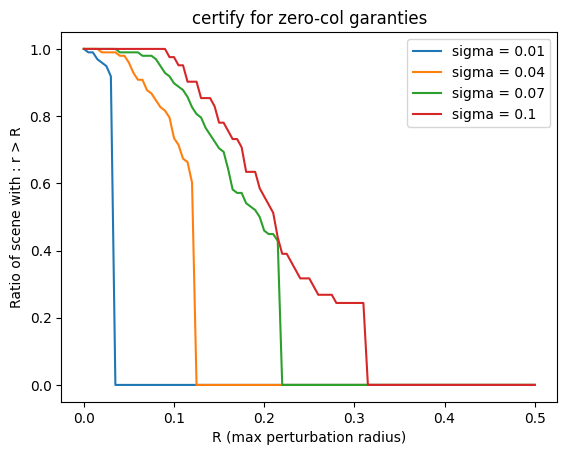

In [5]:
max_radius = 0.5
radius_step = 0.005
radii = np.arange(0, max_radius + radius_step, radius_step)

sigmas = df["sigma"].unique()

for sig in sigmas:
    val = np.array([at_radius(df[df["sigma"] == sig], radius) for radius in radii])
    plt.plot(radii, val, label = f"sigma = {sig}")


plt.title("certify for zero-col garanties")
plt.legend()
plt.xlabel("R (max perturbation radius)")
plt.ylabel("Ratio of scene with : r > R")

# PREDICT